# DAVIVIENDA NLP

## Twitter

In [1]:
# importar librerias
import pandas as pd 
import tweepy

In [2]:
# Leer llaves
keys = pd.read_csv("D:/01. PC LENOVO/02. ESPECIALIZACION/Semestre 2/2. NLP/12 Clase/keys_demo.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [3]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_secret_key'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
#Recolectar twits de bogota
tweets = tweepy.Cursor(api.search,
                       q=['DAVIVIENDA -RT'],
                       lang='es',
                       #geocode=f'4.60971,-74.08175,45mi',
                       tweet_mode='extended',
                       include_rts=False).items(5000)

In [6]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
#    temp.append("Bogota")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [7]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'user_location', 'id', 'link']
data.head()

,tweet,date,user_location,id,link
0,Los progres del twitter tienen el descaro de d...,2021-05-15 08:51:47,Cereté - Córdoba - Colombia,1393489272506920964,https://twitter.com/i/web/status/1393489272506...
1,@WRadioColombia Vándalos policías ASESINOS inc...,2021-05-15 08:51:03,,1393489089366831105,https://twitter.com/i/web/status/1393489089366...
2,@EdwBallesteros @JCardenasRey @PoliciaColombia...,2021-05-15 08:50:19,"Bogotá, D.C., Colombia",1393488905777946624,https://twitter.com/i/web/status/1393488905777...
3,https://t.co/JjOlPKYOmG cómo ve ..los que supu...,2021-05-15 08:43:20,,1393487149220179968,https://twitter.com/i/web/status/1393487149220...
4,@CabeceraV Si ya en múltiples videos se ve que...,2021-05-15 08:34:09,Bogotá // Colombia,1393484836032163841,https://twitter.com/i/web/status/1393484836032...


In [8]:
data = data[['tweet', 'date']]
data.head()

,tweet,date
0,Los progres del twitter tienen el descaro de d...,2021-05-15 08:51:47
1,@WRadioColombia Vándalos policías ASESINOS inc...,2021-05-15 08:51:03
2,@EdwBallesteros @JCardenasRey @PoliciaColombia...,2021-05-15 08:50:19
3,https://t.co/JjOlPKYOmG cómo ve ..los que supu...,2021-05-15 08:43:20
4,@CabeceraV Si ya en múltiples videos se ve que...,2021-05-15 08:34:09


In [9]:
# Quitar links, menciones, hashtags
# Quitar emojis
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [10]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,tweet,date,clean,links,hashtags,mentions
0,Los progres del twitter tienen el descaro de d...,2021-05-15 08:51:47,Los progres del twitter tienen el descaro de d...,[https://t.co/BQW67ISely],"[#PopayanResiste, #Popayan, #ParoNacional, #Co...",[]
1,@WRadioColombia Vándalos policías ASESINOS inc...,2021-05-15 08:51:03,Vándalos policías ASESINOS incendian cajero d...,[https://t.co/yfm4c5N32q],[],[@WRadioColombia]
2,@EdwBallesteros @JCardenasRey @PoliciaColombia...,2021-05-15 08:50:19,Si los mismos policías quemaron davivienda,[],[],"[@EdwBallesteros, @JCardenasRey, @PoliciaColom..."
3,https://t.co/JjOlPKYOmG cómo ve ..los que supu...,2021-05-15 08:43:20,cómo ve ..los que supuestamente nos protegen ...,[https://t.co/JjOlPKYOmG],[],[]
4,@CabeceraV Si ya en múltiples videos se ve que...,2021-05-15 08:34:09,Si ya en múltiples videos se ve que los vánda...,[],[],[@CabeceraV]


In [11]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [12]:
data.head()

,tweet,date,clean,links,hashtags,mentions,emojis
0,Los progres del twitter tienen el descaro de d...,2021-05-15 08:51:47,Los progres del twitter tienen el descaro de d...,[https://t.co/BQW67ISely],"[#PopayanResiste, #Popayan, #ParoNacional, #Co...",[],[]
1,@WRadioColombia Vándalos policías ASESINOS inc...,2021-05-15 08:51:03,Vándalos policías ASESINOS incendian cajero d...,[https://t.co/yfm4c5N32q],[],[@WRadioColombia],[]
2,@EdwBallesteros @JCardenasRey @PoliciaColombia...,2021-05-15 08:50:19,Si los mismos policías quemaron davivienda,[],[],"[@EdwBallesteros, @JCardenasRey, @PoliciaColom...",[]
3,https://t.co/JjOlPKYOmG cómo ve ..los que supu...,2021-05-15 08:43:20,cómo ve ..los que supuestamente nos protegen ...,[https://t.co/JjOlPKYOmG],[],[],[]
4,@CabeceraV Si ya en múltiples videos se ve que...,2021-05-15 08:34:09,Si ya en múltiples videos se ve que los vánda...,[],[],[@CabeceraV],[]


In [13]:
data['fecha'] = data.date.dt.date
temp = pd.DataFrame(data.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')
temp

,fecha,cnt
3,2021-05-12,103
2,2021-05-13,123
1,2021-05-14,143
0,2021-05-15,292


In [14]:
data.count()

tweet       661
date        661
clean       661
links       661
hashtags    661
mentions    661
emojis      661
fecha       661
dtype: int64

In [15]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [16]:
trace = go.Scatter(x=temp.fecha.values,
                   y=temp.cnt.values,
                   text=[f"Fecha: {f}<br>Tuits: {c}" for f,c in zip(temp.fecha.values,temp.cnt.values)],
                   hoverinfo='text',
                   mode='lines+markers',
                   name='Días',
                   line={'color':'#1DA1F2'})


layout = go.Layout(title='Número de tuits por día')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [17]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
10,🤬,16
4,🔥,14
37,😂,10
2,🇨🇴,8
6,🥺,8


In [18]:
trace = go.Bar(x=temp_emojis.emoji.values,
               y=temp_emojis.cnt.values)

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [19]:
#Se realiza representación vectorial con TF-IDF
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado, ngram_range=(1,1), max_features=100)
tfidf = tfidf_vect.fit_transform(data.clean.values)

In [20]:
#Matriz de similaridad del coseno
from sklearn.metrics.pairwise import cosine_similarity

voc = [k for k,v in sorted(tfidf_vect.vocabulary_.items(), key=lambda kv: kv[1])]
temp = pd.DataFrame(tfidf.toarray())
temp = cosine_similarity(temp.T.values)
temp = pd.DataFrame(temp)
temp.columns = voc
temp.index = voc
temp

,ahora,alison,asesina,atentos,ayudarle,banco,bancolombia,bancos,bien,bucaramanga,...,tardes,tarjeta,tener,twitter,ustedes,validaremos,ve,violadores,vándalos,únicamente
ahora,1.000000,0.463251,0.463251,0.000000,0.000000,0.013228,0.0,0.081536,0.000000,0.030168,...,0.000000,0.0,0.01335,0.421158,0.266356,0.000000,0.000000,0.354067,0.129120,0.000000
alison,0.463251,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.909137,0.574972,0.000000,0.000000,0.764310,0.278726,0.000000
asesina,0.463251,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.909137,0.574972,0.000000,0.000000,0.764310,0.278726,0.000000
atentos,0.000000,0.000000,0.000000,1.000000,0.273103,0.081575,0.0,0.000000,0.000000,0.000000,...,0.381486,0.0,0.00000,0.000000,0.000000,0.489022,0.000000,0.000000,0.000000,0.233533
ayudarle,0.000000,0.000000,0.000000,0.273103,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.363250,0.0,0.00000,0.000000,0.000000,0.035772,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
validaremos,0.000000,0.000000,0.000000,0.489022,0.035772,0.000000,0.0,0.000000,0.000000,0.000000,...,0.338043,0.0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.046665
ve,0.000000,0.000000,0.000000,0.000000,0.000000,0.048706,0.0,0.034842,0.108543,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.024899,0.000000
violadores,0.354067,0.764310,0.764310,0.000000,0.000000,0.019527,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.694862,0.439457,0.000000,0.000000,1.000000,0.270778,0.000000
vándalos,0.129120,0.278726,0.278726,0.000000,0.000000,0.077914,0.0,0.000000,0.000000,0.085662,...,0.000000,0.0,0.00000,0.253400,0.160260,0.000000,0.024899,0.270778,1.000000,0.000000


In [21]:
import scipy.cluster.hierarchy as sch
import numpy as np

pairwise_distances = sch.distance.pdist(temp)
linkage = sch.linkage(pairwise_distances, method='ward')
idx_to_cluster_array = sch.fcluster(linkage, pairwise_distances.max() * 1, criterion='distance')
idx = np.argsort(idx_to_cluster_array)
temp = temp.copy()
    
temp2 = temp.iloc[idx, :].T.iloc[idx, :]
my_idx = idx_to_cluster_array

In [22]:
trace = go.Heatmap(z=temp2.values.tolist(),
                   x=temp2.index.values,
                   y=temp2.columns.values,
                   colorscale='Oranges')

layout = go.Layout(title='🔥 Mapa de calor entre palabras (ordenado)🔥',
                   width=800, height=800)

fig = go.Figure(data=[trace],layout=layout)
iplot(fig)

In [26]:
#Libreria VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

#Se aplica el modelo
data['sentimiento'] = data['clean'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sentimiento'].head(50)

0     0.1280
1     0.0000
2     0.0000
3     0.0000
4     0.0000
5    -0.2960
6     0.0000
7     0.0000
8     0.0000
9     0.0000
10    0.0000
11    0.0000
12   -0.2960
13    0.0000
14   -0.2960
15   -0.2960
16   -0.2960
17   -0.7351
18    0.0000
19    0.0000
20   -0.5411
21   -0.6808
22    0.0000
23   -0.2960
24    0.0000
25    0.0000
26    0.0000
27    0.0000
28   -0.2960
29    0.0000
30    0.0000
31    0.0000
32    0.0000
33    0.0000
34    0.0000
35    0.0000
36   -0.2960
37   -0.2960
38    0.0000
39   -0.2960
40    0.0000
41   -0.2960
42    0.0000
43    0.0000
44    0.0000
45    0.3612
46    0.4767
47    0.0000
48    0.0000
49   -0.2960
Name: sentimiento, dtype: float64

## Reseña mas negativa 

In [32]:
data.sort_values('sentimiento')

,tweet,date,clean,links,hashtags,mentions,emojis,fecha,sentimiento
233,@WRadioColombia Ese Davivienda estaba en el lu...,2021-05-15 03:07:19,Ese Davivienda estaba en el lugar equivocado!...,[],[],[@WRadioColombia],"[🔥, 🔥, 🔥, 🔥, 🔥, 🔥]",2021-05-15,-0.9134
469,Ósea que Davivienda ya no deja retirar 10mil? ...,2021-05-13 18:49:08,Ósea que Davivienda ya no deja retirar 10mil? ...,[],[],[],"[🥴, 😢, 😢, 😢]",2021-05-13,-0.8885
401,Ojo! @Davivienda está cobrando sin avisar cuot...,2021-05-14 13:13:28,Ojo! está cobrando sin avisar cuotas de manej...,[],[],[@Davivienda],[],2021-05-14,-0.8765
237,@Davivienda maneja un servicio al cliente pési...,2021-05-15 03:03:17,"maneja un servicio al cliente pésimo, me deja...",[],[],[@Davivienda],[],2021-05-15,-0.8555
528,@davivienda A esta hora su ATM en el IDRD anda...,2021-05-13 13:06:34,A esta hora su ATM en el IDRD anda sin cinco!...,[],[],[@davivienda],[],2021-05-13,-0.8217
...,...,...,...,...,...,...,...,...,...
453,@pattysvarona @FisicoImpuro Jajajaja no somos ...,2021-05-13 20:43:57,"Jajajaja no somos coreanos, somos Combianos ...",[],[],"[@pattysvarona, @FisicoImpuro]","[😂, 👌]",2021-05-13,0.7804
441,"@AnaPepe01 Se llama colpagos, es un negocio de...",2021-05-13 22:49:31,"Se llama colpagos, es un negocio de Multipago...",[],[],[@AnaPepe01],[🥰],2021-05-13,0.8074
272,Quemaron otro Davivienda en Bucaramanga 🥰,2021-05-15 01:26:44,Quemaron otro Davivienda en Bucaramanga 🥰,[],[],[],[🥰],2021-05-15,0.8074
281,Davivienda volvió a estar en el lugar equivoca...,2021-05-15 01:12:40,Davivienda volvió a estar en el lugar equivoca...,[],[],[],"[😂, 😂, 😂]",2021-05-15,0.8271


In [29]:
data.loc[233]['tweet']

'@WRadioColombia Ese Davivienda estaba en el lugar equivocado!\n🔥🔥🔥🔥🔥🔥'

## Reseña mas positiva

In [30]:
data.sort_values('sentimiento',ascending=False)

,tweet,date,clean,links,hashtags,mentions,emojis,fecha,sentimiento
599,@oropel445 @DanielSamperO @CatharsisValley A d...,2021-05-12 19:05:39,A donde tengo que ir para que me paguen?jaj...,[],[],"[@oropel445, @DanielSamperO, @CatharsisValley]","[😂, 😂, 😂, 😂]",2021-05-12,0.8910
281,Davivienda volvió a estar en el lugar equivoca...,2021-05-15 01:12:40,Davivienda volvió a estar en el lugar equivoca...,[],[],[],"[😂, 😂, 😂]",2021-05-15,0.8271
441,"@AnaPepe01 Se llama colpagos, es un negocio de...",2021-05-13 22:49:31,"Se llama colpagos, es un negocio de Multipago...",[],[],[@AnaPepe01],[🥰],2021-05-13,0.8074
272,Quemaron otro Davivienda en Bucaramanga 🥰,2021-05-15 01:26:44,Quemaron otro Davivienda en Bucaramanga 🥰,[],[],[],[🥰],2021-05-15,0.8074
453,@pattysvarona @FisicoImpuro Jajajaja no somos ...,2021-05-13 20:43:57,"Jajajaja no somos coreanos, somos Combianos ...",[],[],"[@pattysvarona, @FisicoImpuro]","[😂, 👌]",2021-05-13,0.7804
...,...,...,...,...,...,...,...,...,...
528,@davivienda A esta hora su ATM en el IDRD anda...,2021-05-13 13:06:34,A esta hora su ATM en el IDRD anda sin cinco!...,[],[],[@davivienda],[],2021-05-13,-0.8217
237,@Davivienda maneja un servicio al cliente pési...,2021-05-15 03:03:17,"maneja un servicio al cliente pésimo, me deja...",[],[],[@Davivienda],[],2021-05-15,-0.8555
401,Ojo! @Davivienda está cobrando sin avisar cuot...,2021-05-14 13:13:28,Ojo! está cobrando sin avisar cuotas de manej...,[],[],[@Davivienda],[],2021-05-14,-0.8765
469,Ósea que Davivienda ya no deja retirar 10mil? ...,2021-05-13 18:49:08,Ósea que Davivienda ya no deja retirar 10mil? ...,[],[],[],"[🥴, 😢, 😢, 😢]",2021-05-13,-0.8885


In [34]:
data.loc[281]['tweet']

'Davivienda volvió a estar en el lugar equivocado 😂😂😂'

# Graficas de las tweets

In [35]:
grafica = pd.DataFrame({"Sentimiento": ['Positivo', 'Negativo', 'Neutro'], 
                        "Cantidad": [len(data.sentimiento[data.sentimiento>0]), 
                                           len(data.sentimiento[data.sentimiento<0]), 
                                           len(data.sentimiento[data.sentimiento==0])]})
grafica

,Sentimiento,Cantidad
0,Positivo,85
1,Negativo,208
2,Neutro,368


In [37]:
import tweepy
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
trace = go.Bar(x=grafica.Sentimiento.values,
               y=grafica.Cantidad.values)
layout = go.Layout(title='Cantidad de tweets por sentimiento')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Nube de palabras positivas

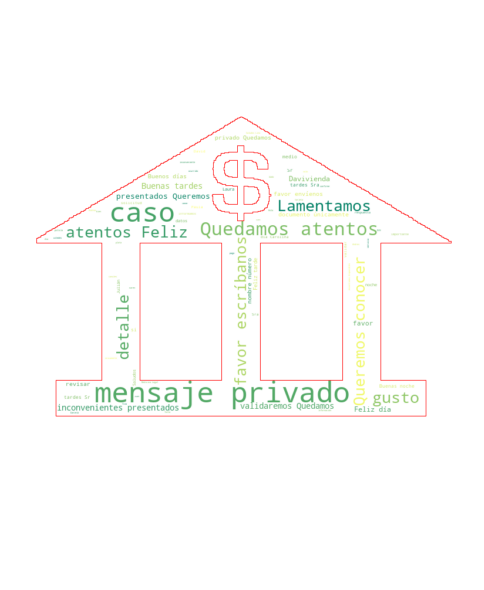

In [86]:
import numpy as np 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator 
import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display
from nltk.corpus import stopwords
casa = PIL.Image.open("D:/01. PC LENOVO/05. ENTREVISTA TRABAJO/01. DAVIVIENDA/davivienda.png")
mask1 = np.array(casa)

# Palabras positivas 
palabras_pos = data.clean[data.sentimiento>0].str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='summer_r',stopwords=stopwords_sp,
                     mask=mask1, contour_width=0.5, contour_color='red').generate(palabras_pos) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Nube de palabras Neutras

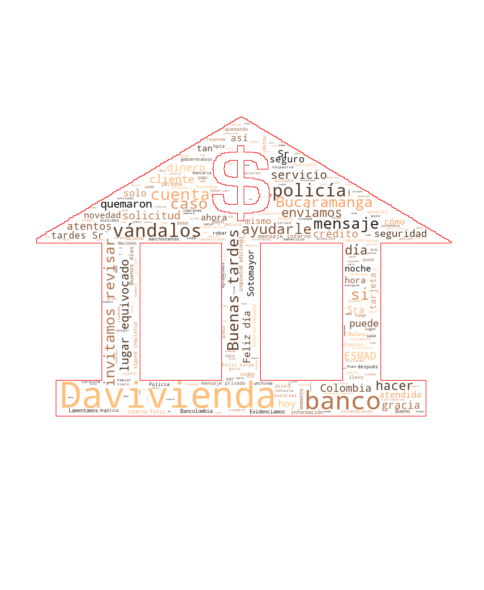

In [88]:
# Palabras neutras 
palabras_pos = data.clean[data.sentimiento==0].str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='copper',stopwords=stopwords_sp,
                     mask=mask1, contour_width=0.5, contour_color='red').generate(palabras_pos) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Nube de palabras Negativas

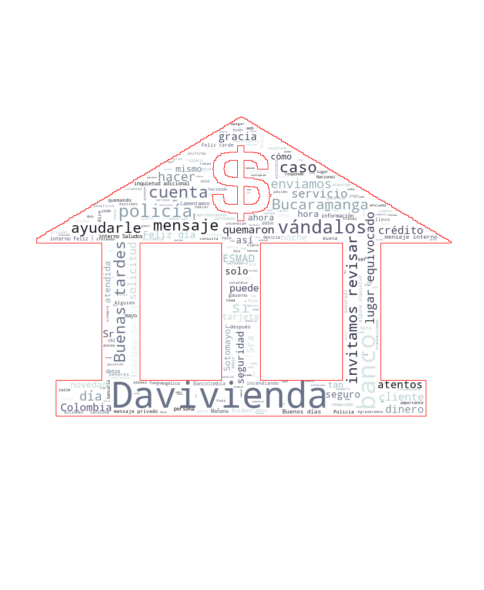

In [89]:
# Palabras negativas
palabras_pos = data.clean[data.sentimiento==0].str.cat(sep=' ')
 
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='bone',stopwords=stopwords_sp,
                     mask=mask1, contour_width=0.5, contour_color='red').generate(palabras_pos) 
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()